<a href="https://colab.research.google.com/github/NadAAaHH/SDAIA_T5_classification_project/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: load and clean the data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv(r'C:\Users\Nadar\OneDrive\Desktop\SDAIA\Classification\credit_train.csv')

In [ ]:
# remove data beyond 100000 because they are all null rows
df = df[:100000]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null 

In [ ]:
# explore null values 
df[list(df.columns)].isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [ ]:
def data_cleaning(df):
    # handle NaNs in Tax Liens feature
    df['Tax Liens'] = df['Tax Liens'].fillna(0)
    df['Tax Liens'] = df['Tax Liens'].astype(np.float16)
    
    # handle NaNs in Bankruptcies feature
    df['Bankruptcies'] = df['Bankruptcies'].fillna(0)
    df['Bankruptcies'] = df['Bankruptcies'].astype(np.float16)
    
    # handle NaNs in Maximum Open Credit feature
    df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(0)
    
    # handle NaNs in Months since last delinquent feature
    df['Months since last delinquent'] = df['Months since last delinquent'].fillna(0)
    df['Months since last delinquent'] = df['Months since last delinquent'].astype(np.float16)
    
    # handle NaNs in Current Loan Amount feature
    df = df[df['Current Loan Amount'] != 99999999]
    
    # Items in the credit score columns have values that exceed normal credit ratings of 0-850. 
    # These values have an extra zero in the rightmost digit. For example the value is 7330, but should be 733.
    df['Credit Score'] = df['Credit Score'].apply(lambda x: int(str(x)[:3]) if len(str(x)) >= 4 else x)
    df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)
    
    # handle NaNs in Annual Income feature
    df['Annual Income'].fillna(df['Annual Income'].median(), inplace=True)
    
    # handle NaNs in Years in current job
    df['Years in current job'].replace('[^0-9]',"", inplace=True, regex=True)
    df['Years in current job'].fillna(int(df['Years in current job'].mode()),inplace=True)
    df['Years in current job'] = df['Years in current job'].astype(np.float16)
    
    # encode categorical features
    df['Loan Status'] = pd.get_dummies(df['Loan Status'], dtype=float)
    df['Term'] = pd.get_dummies(df['Term'], dtype=float)
    
    # encode Home Ownership feature
    df["Home Ownership"].replace({"HaveMortgage": "Mortgage", "Home Mortgage": "Mortgage"}, inplace=True)
    ownerships = df['Home Ownership'].unique()
    encoded_dict = dict(zip(ownerships, range(len(ownerships)))) 
    df['Home Ownership'] = df['Home Ownership'].replace(encoded_dict)
    df['Home Ownership'] = df['Home Ownership'].astype(np.float16)
    
    # encode Purpose feature
    df["Purpose"].replace({"other": "others", "Other": "others"}, inplace=True)
    purposes = df['Purpose'].unique()
    encoded_dict = dict(zip(purposes, range(len(purposes)))) 
    print(encoded_dict)
    df['Purpose'] = df['Purpose'].replace(encoded_dict)
    df['Purpose'] = df['Purpose'].astype(np.float16)
    
    # encode some feature types
    df['Number of Open Accounts'] = df['Number of Open Accounts'].astype(np.float16)
    df['Number of Credit Problems'] = df['Number of Credit Problems'].astype(np.float16)
    
    # drop unnecessary features
    df.drop(['Customer ID', 'Loan ID'], axis=1, inplace=True)
    
    return df

In [ ]:
df = data_cleaning(df)

<ipython-input-19-3aec05483c51>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Credit Score'] = df['Credit Score'].apply(lambda x: int(str(x)[:3]) if len(str(x)) >= 4 else x)
C:\Users\Nadar\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\Nadar\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

{'Home Improvements': 0, 'Debt Consolidation': 1, 'Buy House': 2, 'others': 3, 'Buy a Car': 4, 'major_purchase': 5, 'Take a Trip': 6, 'Business Loan': 7, 'small_business': 8, 'Medical Bills': 9, 'vacation': 10, 'Educational Expenses': 11, 'wedding': 12, 'moving': 13, 'renewable_energy': 14}


<ipython-input-19-3aec05483c51>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Purpose'] = df['Purpose'].replace(encoded_dict)
<ipython-input-19-3aec05483c51>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Purpose'] = df['Purpose'].astype(np.float16)
<ipython-input-19-3aec05483c51>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [ ]:
df[list(df.columns)].isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

Step 2: explore the data

0.0    65877
1.0    22639
Name: Loan Status, dtype: int64


C:\Users\Nadar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


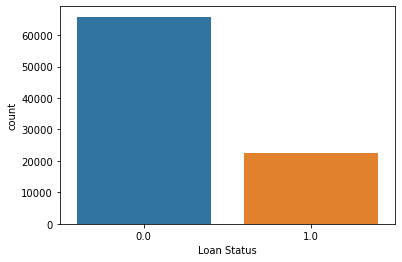

In [ ]:
# visualize the classes counts of the target variable
print(df['Loan Status'].value_counts())
g = sns.countplot(df['Loan Status'])
plt.show();

0.0    22639
1.0    22639
Name: Loan Status, dtype: int64


C:\Users\Nadar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


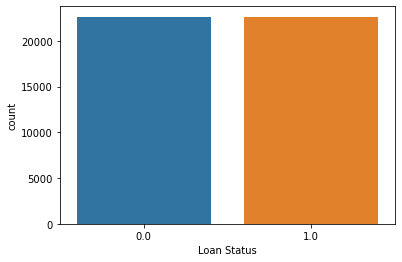

In [ ]:
# classes count
class_count_pos, class_count_neg = df['Loan Status'].value_counts()

# separate classes
class_pos = df[df['Loan Status'] == 0]
class_neg = df[df['Loan Status'] == 1]

# balance classes by undersampling
class_count_pos_under = class_pos.sample(class_count_neg)

# compine into one dataframe
balanced_df = pd.concat([class_count_pos_under, class_neg], axis=0).reset_index(drop=True)

# plot the counts after under-sampeling
print(balanced_df['Loan Status'].value_counts())
g = sns.countplot(balanced_df['Loan Status'])
plt.show();

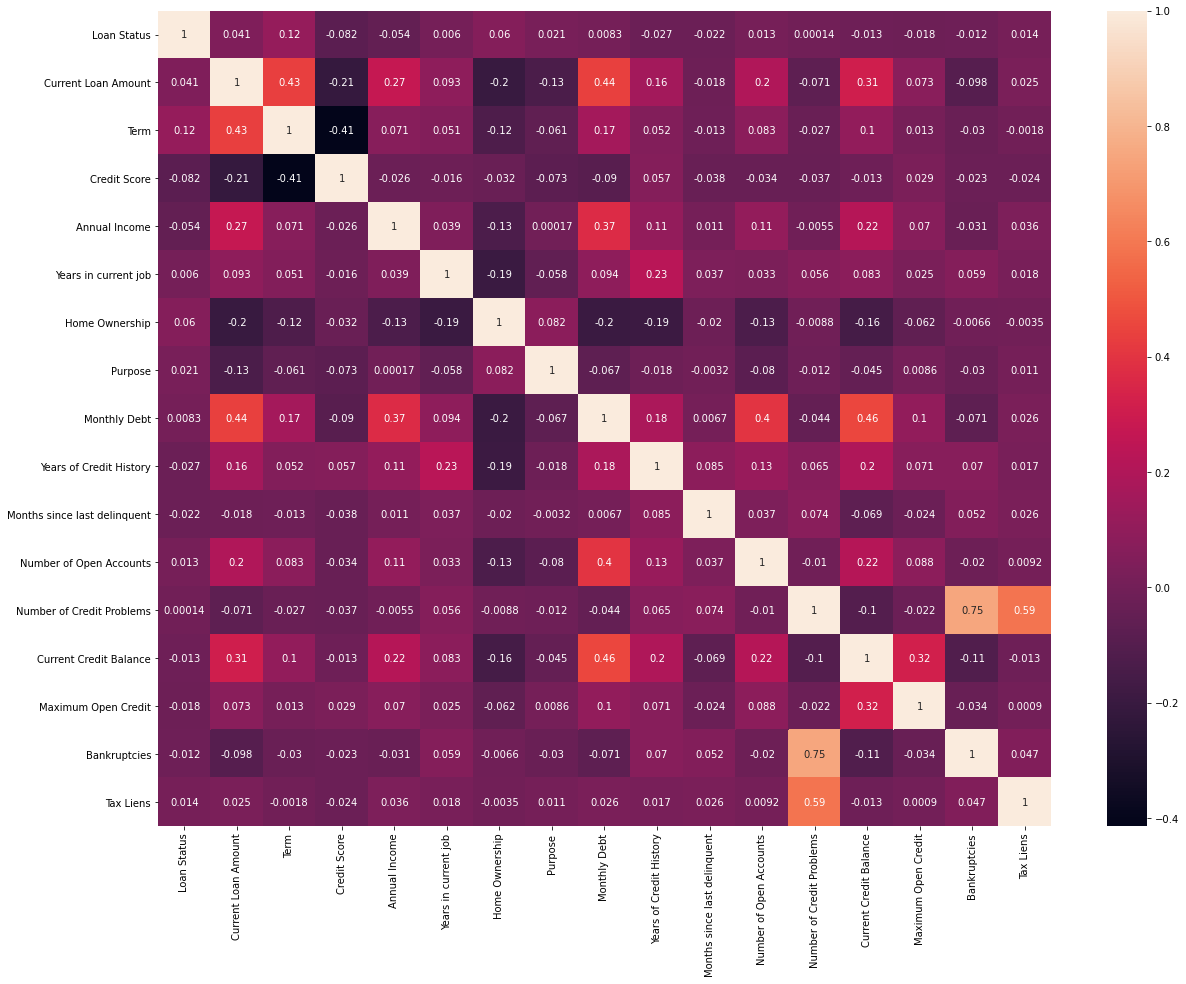

In [ ]:
# plot the heatmap
plt.subplots(figsize=(20,15))
sns.heatmap(balanced_df.corr(), annot = True);

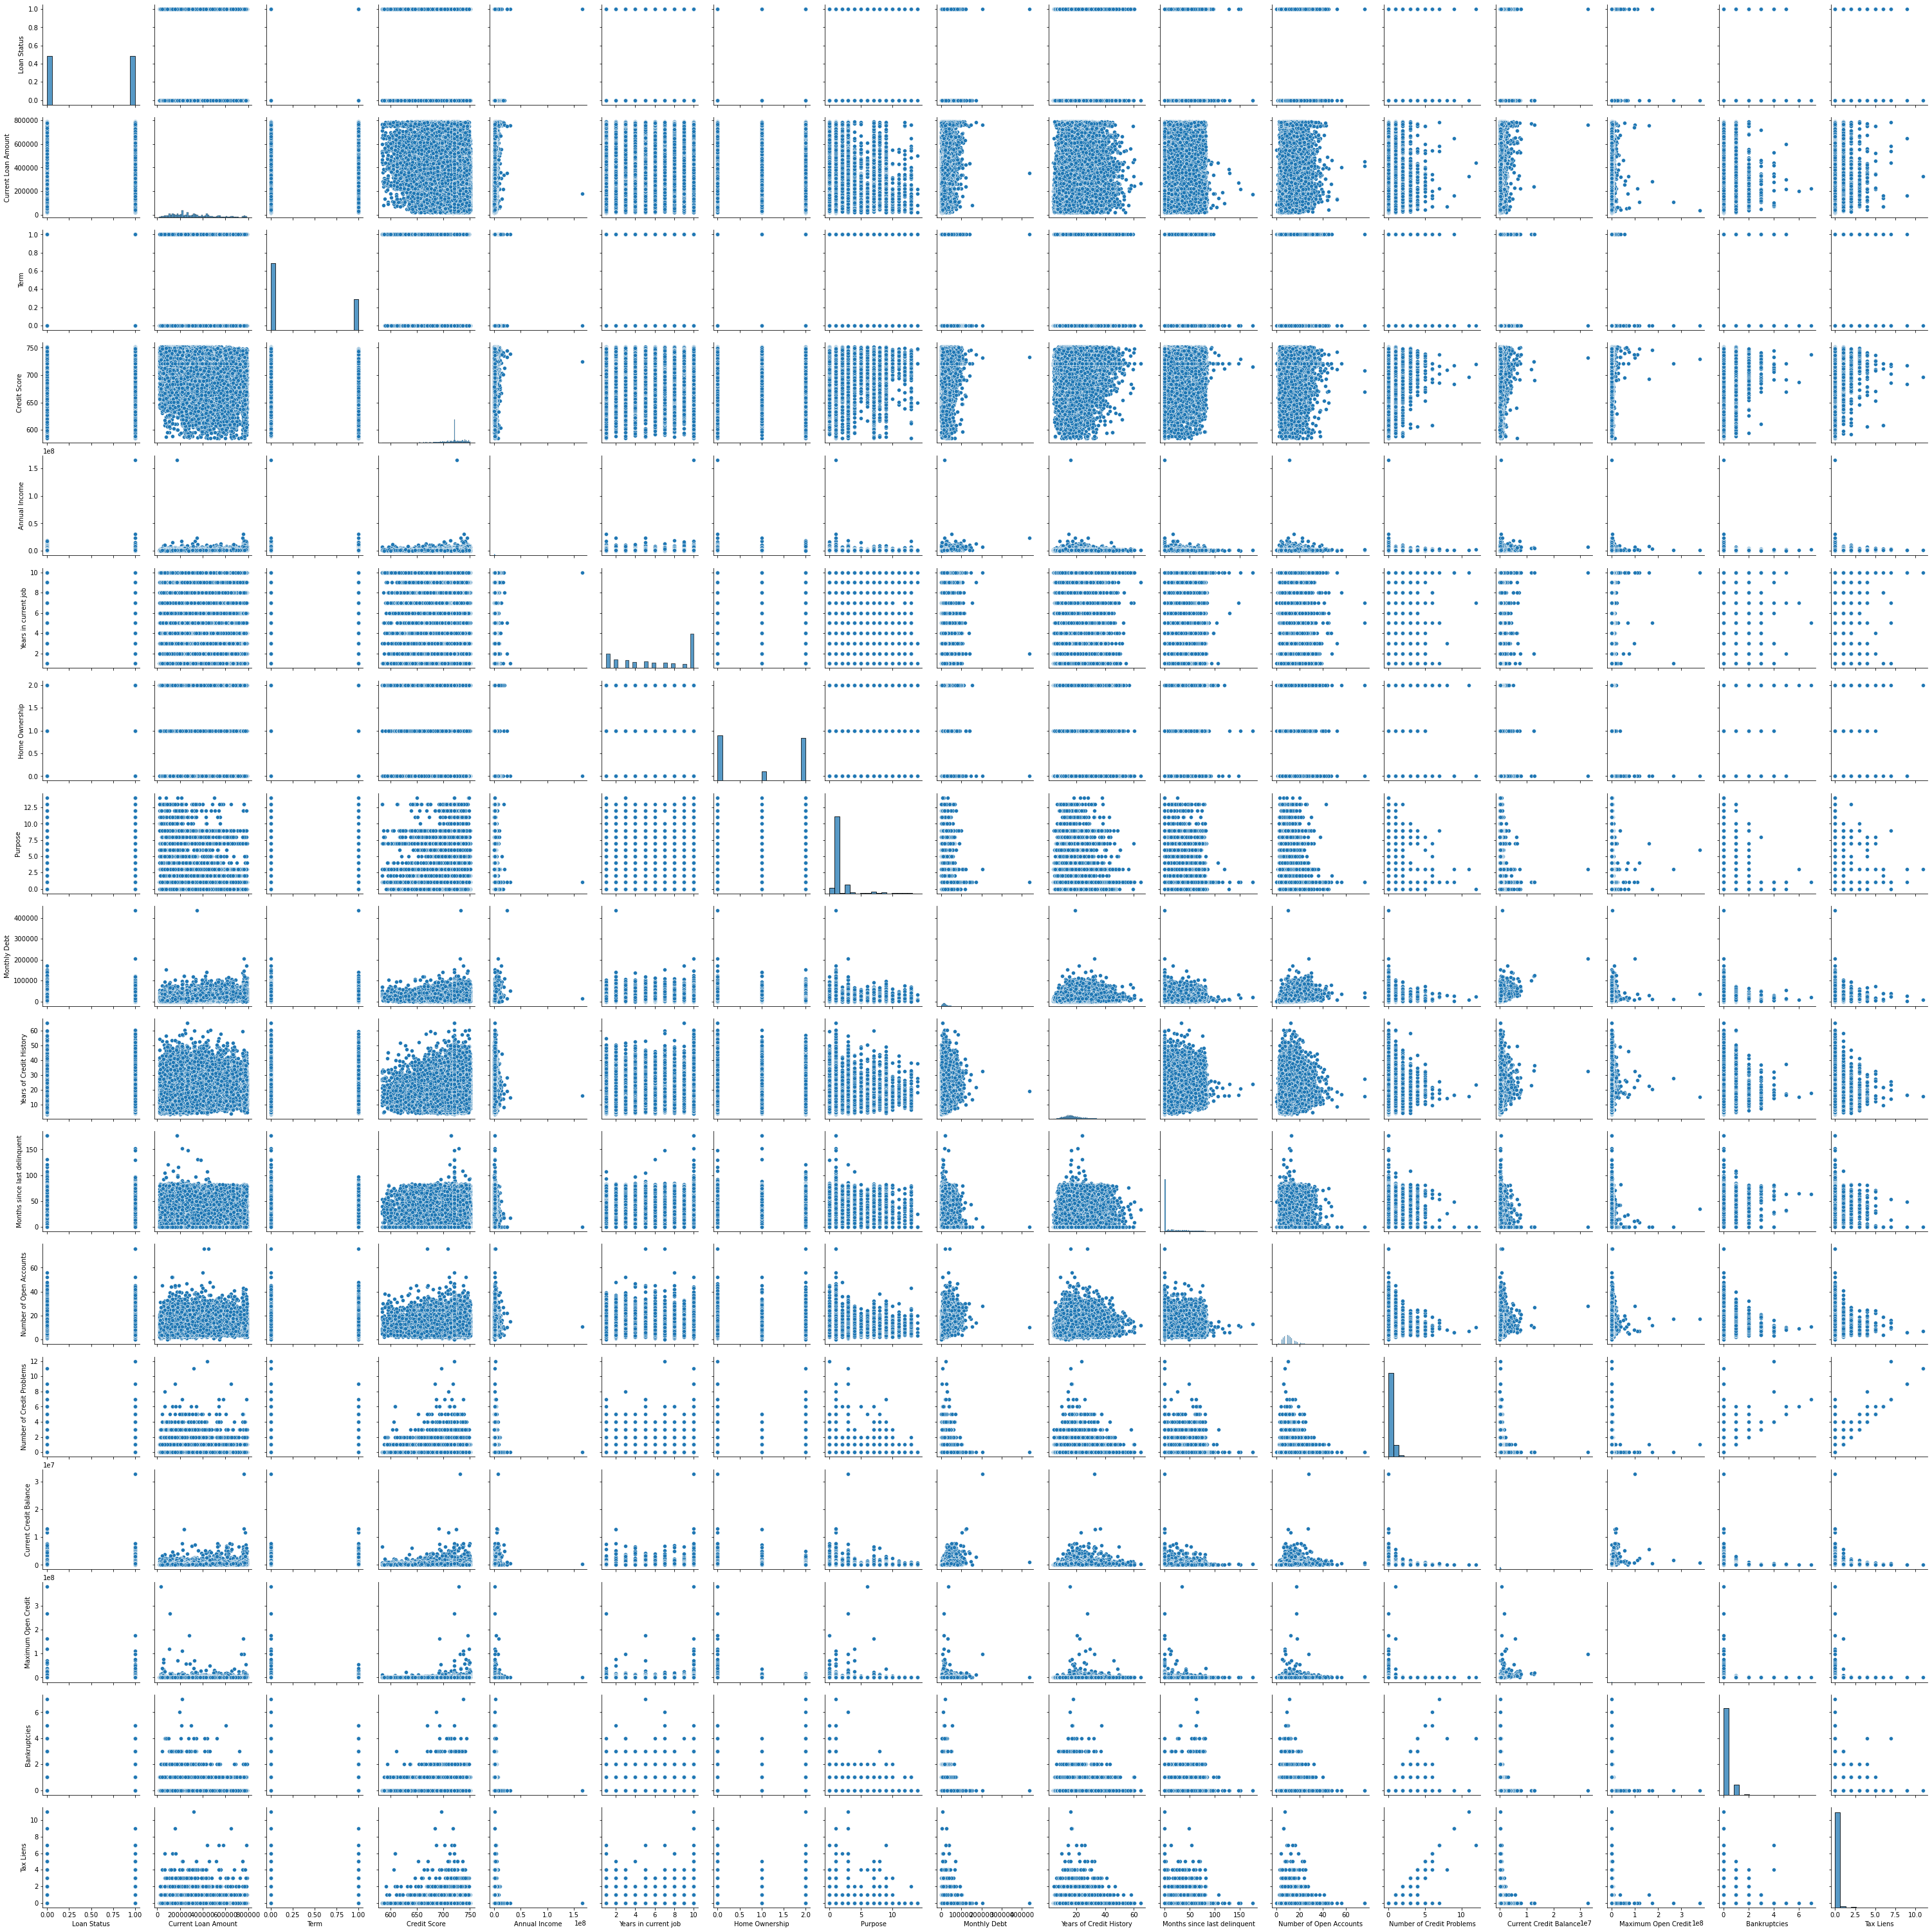

In [ ]:
# plot the pair plot
sns.pairplot(balanced_df);